## Support Vector Machine

## Máquina de Vetores de Suporte

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from sklearn.datasets import make_classification

In [4]:
X,y = make_classification(
    n_samples=10_000,        ## 10k amostras
    n_features=2,            ## 2 colunas (2 caracteristicas)
    n_informative=2,         ## essas duas colunas tem informações importantes sobre o y
    n_redundant=0,           ## gerar colunas correlaciondas; nesse caso, não estamos gerando
    n_classes=2,             ## 
    n_clusters_per_class=1,  ## para cada classe, 1 cluster
    class_sep=2,             ## quão fácil é o meu problema; quão maior o número, melhor as classes estarão separadas
    flip_y=0,                ## número > 0 = inverte um pouco as classes. introduzir ruído
    scale=1.,                ## embaralhar as classes, aleatoriedade
    random_state=42          ## gerar sempre o mesmo conjunto
)

X

array([[-1.41258169,  1.95744559],
       [ 2.59928079,  2.33739959],
       [-1.51671004,  1.3448303 ],
       ...,
       [-0.8884581 ,  0.97253017],
       [ 1.81835488,  0.96181981],
       [-2.49848631,  2.22767294]])

In [5]:
X.shape

(10000, 2)

In [6]:
X = pd.DataFrame(X, columns=['feat_1', 'feat_2'])
y = pd.Series(y)

X

feat_1    feat_2
0    -1.412582  1.957446
1     2.599281  2.337400
2    -1.516710  1.344830
3     2.204172  2.077315
4    -1.559352  2.253855
...        ...       ...
9995 -1.283983  1.107912
9996 -2.901450  2.575456
9997 -0.888458  0.972530
9998  1.818355  0.961820
9999 -2.498486  2.227673

[10000 rows x 2 columns]

In [7]:
y

0       0
1       1
2       0
3       1
4       0
       ..
9995    0
9996    0
9997    0
9998    1
9999    0
Length: 10000, dtype: int32

### Train, Test Split

Como não temos noção de tempo, não faremos uma separação `out of time`, faremos uma separação `out of sample`.

In [8]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X,y, test_size=.3, random_state=61658)

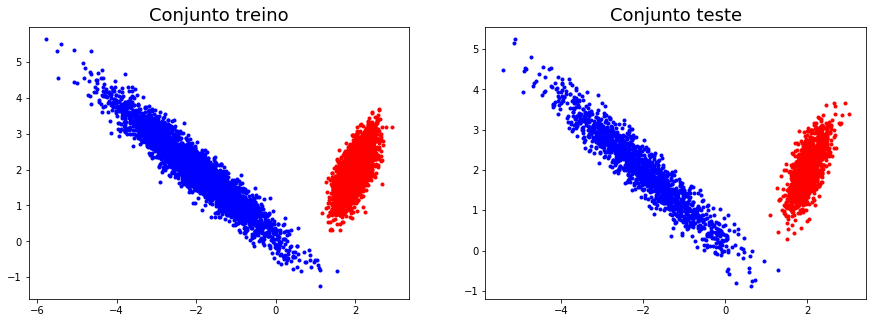

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_treino.loc[y_treino==0].feat_1, X_treino.loc[y_treino==0].feat_2, 'b.')
plt.plot(X_treino.loc[y_treino==1].feat_1, X_treino.loc[y_treino==1].feat_2, 'r.')
plt.title("Conjunto treino", fontsize=18)

plt.subplot(1,2,2)
plt.plot(X_teste.loc[y_teste==0].feat_1, X_teste.loc[y_teste==0].feat_2, 'b.')
plt.plot(X_teste.loc[y_teste==1].feat_1, X_teste.loc[y_teste==1].feat_2, 'r.')
plt.title("Conjunto teste", fontsize=18)

plt.show()

## Agora, vamos ver o SVM:
### Por enquanto, vamos ver sem muitos parâmetros...

In [10]:
from sklearn.svm import SVC
## Support Vector Classification

svc = SVC(C=1., 
          kernel = 'linear',      ## podemos ter kernel's não lineares
          probability = True,     ## na forma como o SVM é contruída, ele não consegue voltar um score, somente 1 ou 0. Aqui temos um score 
          random_state = 61658
          )

svc.fit(X_treino, y_treino)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=61658, shrinking=True,
    tol=0.001, verbose=False)

### Vendo os valores encontrados de Intercepto e Coeficiente:

In [11]:
svc.intercept_, svc.coef_

(array([-2.36457726]), array([[1.98183094, 1.34637754]]))

# $score \propto intercept + coef_0 \cdot X_0 + coef_1 \cdot X_1$

# $X_1 = (-intercept - coef_0 \cdot X_0) / (coef_1)$

In [12]:
(-1) * -2.36457726 / 1.34637754

1.7562512666395191

#### Vamos ver por onde passa o score = 0.50?

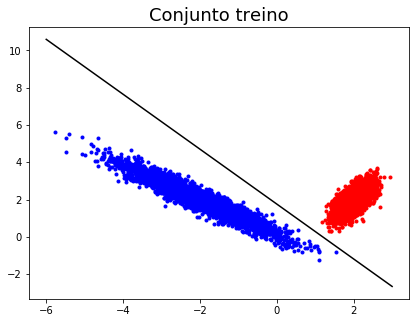

In [13]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.plot(X_treino[y_treino==0].feat_1, X_treino[y_treino==0].feat_2, 'b.')
plt.plot(X_treino[y_treino==1].feat_1, X_treino[y_treino==1].feat_2, 'r.')
plt.title("Conjunto treino", fontsize=18)

x_plot = np.linspace(-6,3,1000)
y_plot = (-svc.intercept_-svc.coef_[0,0]*x_plot)/svc.coef_[0,1]
plt.plot(x_plot, y_plot, 'k-')

plt.show()

# Na formulação matemática, descobriram que somente alguns pontos importam pra encontrar essa reta!

### Que são os Support Vectors

array([ 859, 1894, 6836, 6983,  736, 2340, 3168, 4232])

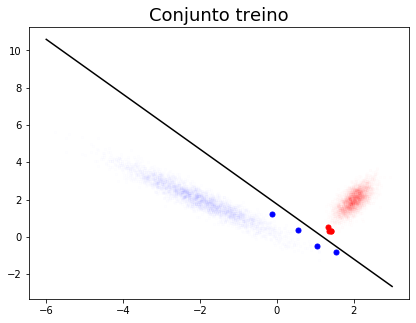

In [14]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_treino.loc[y_treino==0].feat_1,X_treino.loc[y_treino==0].feat_2,'b.',alpha=.003)
plt.plot(X_treino.loc[y_treino==1].feat_1,X_treino.loc[y_treino==1].feat_2,'r.',alpha=.003)

X_treino_sup = X_treino.iloc[svc.support_]
y_treino_sup = y_treino.iloc[svc.support_]

plt.plot(X_treino_sup.loc[y_treino_sup==0].feat_1,X_treino_sup.loc[y_treino_sup==0].feat_2,'b.',alpha=1.,ms=10)
plt.plot(X_treino_sup.loc[y_treino_sup==1].feat_1,X_treino_sup.loc[y_treino_sup==1].feat_2,'r.',alpha=1.,ms=10)
plt.title('Conjunto treino', fontsize=18)

x_plot = np.linspace(-6,3,1000)
y_plot = (-svc.intercept_-svc.coef_[0,0]*x_plot)/svc.coef_[0,1]
plt.plot(x_plot, y_plot, 'k-')

svc.support_

# Ok....mas e se os dados forem mais "zoados"?

Text(0.5, 1.0, 'Conjunto teste')

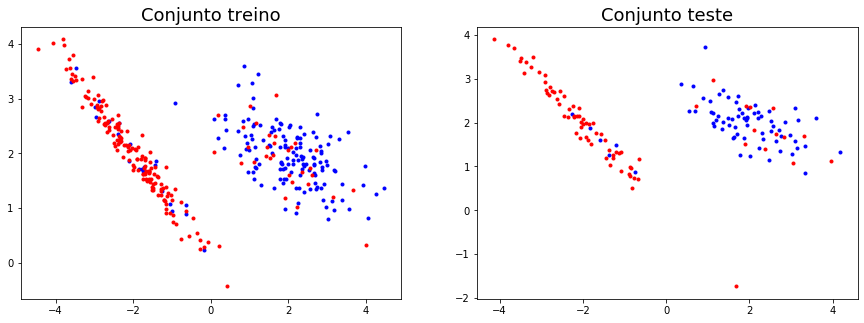

In [15]:
X,y = make_classification(
    n_samples=500,
    n_features=2,
    n_informative=2,
    n_redundant=0,
    n_classes=2,
    n_clusters_per_class=1,
    class_sep=2.,
    flip_y=0.30,
    scale=1.,
    random_state=1,
)

X = pd.DataFrame(X,columns=['feat_1','feat_2'])
y = pd.Series(y)

from sklearn.model_selection import train_test_split
X_tr, X_ts, y_tr, y_ts = train_test_split(X,y, test_size=.3, random_state=61658)


plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
plt.title('Conjunto treino', fontsize=18)

plt.subplot(1,2,2)
plt.plot(X_ts.loc[y_ts==0].feat_1,X_ts.loc[y_ts==0].feat_2,'b.')
plt.plot(X_ts.loc[y_ts==1].feat_1,X_ts.loc[y_ts==1].feat_2,'r.')
plt.title('Conjunto teste', fontsize=18)

# A SVM tem um parâmetro de "Tolerância ao erro"!

0.001
0.01
0.1
1


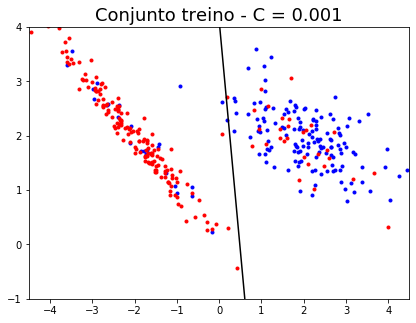

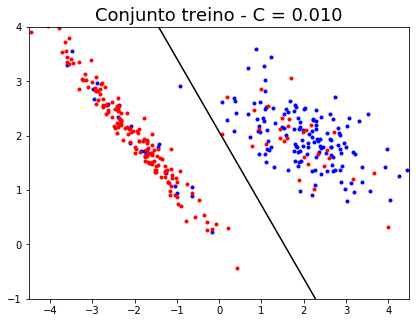

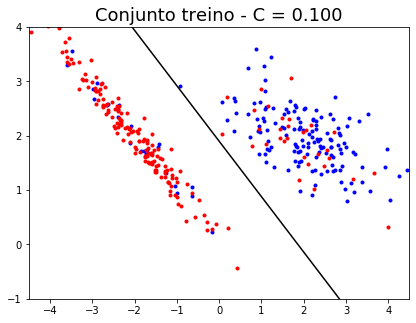

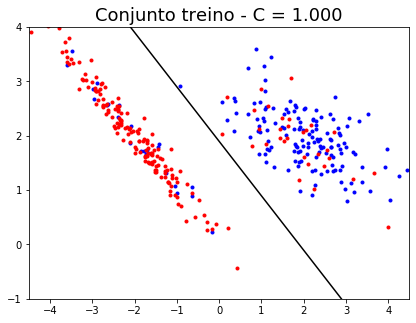

In [19]:
for C in [1e-3,1e-2,1e-1,1,]:
    print(C)

    svc = SVC(C=C, kernel='linear', probability=True, random_state=61658)
    svc.fit(X_tr,y_tr)
    plt.figure(figsize=(15,5))
    plt.subplot(1,2,1)
    plt.plot(X_tr.loc[y_tr==0].feat_1,X_tr.loc[y_tr==0].feat_2,'b.')
    plt.plot(X_tr.loc[y_tr==1].feat_1,X_tr.loc[y_tr==1].feat_2,'r.')
    plt.title(f'Conjunto treino - C = {C:.3f}', fontsize=18)

    x_plot = np.linspace(-6,3,1000)
    y_plot = (-svc.intercept_-svc.coef_[0,0]*x_plot)/svc.coef_[0,1]
    plt.plot(x_plot, y_plot, 'k-')
    plt.ylim(-1,4)
    plt.xlim(-4.5,4.5)

# Agora, vamos para o mundo real! 

In [20]:
df = pd.read_csv("./dados/svm.csv")
df

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        101348.88                 1                  0   
1                  1        112542.58                 0                  0   
2                  0        113931.57                 1                  0   
3                  0         93826.63                 1                  0   
4                  1         79084.10                 0                  0   
...              ...              ...               ...                ...   
9995               0         96270.64                 1                  0   
9996               1        101699.77                 1                  0   
9997               1         42085.58                 1                  0   
9998               0         92888.52                 0                  1   
9999               0         38190.78                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  Exited  
0                   0              1            0       1  
1                   1              1            0       0  
2                   0              1            0       1  
3                   0              1            0       0  
4                   1              1            0       0  
...               ...            ...          ...     ...  
9995                0              0            1       0  
9996                0              0            1       0  
9997                0              1            0       1  
9998                0              0            1       1  
9999                0              1            0       0  

[10000 rows x 14 columns]

In [21]:
X = df.drop("Exited", axis=1)
y = df.Exited
X

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
0             619   42       2       0.00              1          1   
1             608   41       1   83807.86              1          0   
2             502   42       8  159660.80              3          1   
3             699   39       1       0.00              2          0   
4             850   43       2  125510.82              1          1   
...           ...  ...     ...        ...            ...        ...   
9995          771   39       5       0.00              2          1   
9996          516   35      10   57369.61              1          1   
9997          709   36       7       0.00              1          0   
9998          772   42       3   75075.31              2          1   
9999          792   28       4  130142.79              1          1   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                  1        101348.88                 1                  0   
1                  1        112542.58                 0                  0   
2                  0        113931.57                 1                  0   
3                  0         93826.63                 1                  0   
4                  1         79084.10                 0                  0   
...              ...              ...               ...                ...   
9995               0         96270.64                 1                  0   
9996               1        101699.77                 1                  0   
9997               1         42085.58                 1                  0   
9998               0         92888.52                 0                  1   
9999               0         38190.78                 1                  0   

      Geography_Spain  Gender_Female  Gender_Male  
0                   0              1            0  
1                   1              1            0  
2                   0              1            0  
3                   0              1            0  
4                   1              1            0  
...               ...            ...          ...  
9995                0              0            1  
9996                0              0            1  
9997                0              1            0  
9998                0              0            1  
9999                0              1            0  

[10000 rows x 13 columns]

### Olhar para a média do y é válido para problemas de classificação binária

In [22]:
y.mean()

0.2037

Ou seja, 20% da minha base é de classe 1 - são os clientes que abondonaram a empresa.

**Isso gera um problema desbalanceado**

### Vamos separar a base:

In [23]:
from sklearn.model_selection import train_test_split

X_treino, X_teste, y_treino, y_teste = train_test_split(X, y, test_size=.30, random_state=61658)

In [24]:
X_treino

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9057          704   33       0  130499.09              2          1   
81            777   32       2       0.00              1          1   
3433          587   37       6  104414.03              1          1   
1768          760   28       1  141038.57              2          0   
1888          429   60       7       0.00              2          1   
...           ...  ...     ...        ...            ...        ...   
4368          648   33       5  138664.24              1          1   
9637          790   31       2  151290.16              1          1   
8675          714   54       7  126113.28              1          1   
8806          681   38       6  181804.34              2          1   
3836          645   49       5  110132.55              3          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
9057               1         74804.36                 1                  0   
81                 0        136458.19                 1                  0   
3433               0        192026.02                 0                  1   
1768               0         16287.38                 0                  0   
1888               1        163691.48                 1                  0   
...              ...              ...               ...                ...   
4368               0         29076.27                 0                  1   
9637               1        172437.12                 1                  0   
8675               0        112777.38                 1                  0   
8806               1         57517.71                 0                  1   
3836               1        187689.91                 0                  0   

      Geography_Spain  Gender_Female  Gender_Male  
9057                0              1            0  
81                  0              1            0  
3433                0              1            0  
1768                1              0            1  
1888                0              0            1  
...               ...            ...          ...  
4368                0              0            1  
9637                0              1            0  
8675                0              0            1  
8806                0              0            1  
3836                1              1            0  

[7000 rows x 13 columns]

### SVM tem um cuidado a mais: Todas as variáveis precisam estar escaladas

Vamos olhar as escalas das variáveis::

In [25]:
X_treino.CreditScore.min(), X_treino.CreditScore.max()

(350, 850)

In [26]:
X_treino.Age.min(), X_treino.Age.max()

(18, 92)

In [27]:
X_treino.Balance.min(), X_treino.Balance.max()

(0.0, 250898.09)

## Standard Scaler

Vai pegar cada variável, subtrair a média e dividir pelo desvio padrão.
Todo mundo terá média 0 e desvio padrão 1
Basicamente todos estarão entre: -1 e 1

OBS: variáveis de renda, tem uma desigualdade muito grande, podendo ir de 0 a valores gigantes.
O Standard Scaler pode sofrer um pouco mais com essa variedade. 
Média e desvio padrão podem ser pouco representativos nesse caso.

_________________________________________

## Robust Scaler

Ele vai colocar uma certa porcentagem dos meus dados dentro de uma mesma escala.
Ele vai subtrair uma constante, mediana, e dividir por uma grandeza chamada quantis: 5 e -5

In [28]:
from sklearn.preprocessing import RobustScaler

In [29]:
rs = RobustScaler(quantile_range=(5.,95.))
X_treino2 = rs.fit_transform(X_treino)
X_teste2 = rs.transform(X_teste)

In [30]:
pd.DataFrame(X_treino2, columns=X_treino.columns)

CreditScore       Age  Tenure   Balance  NumOfProducts  HasCrCard  \
0        0.160494 -0.114286  -0.625  0.205847            1.0        0.0   
1        0.385802 -0.142857  -0.375 -0.591058            0.0        0.0   
2       -0.200617  0.000000   0.125  0.046556            0.0        0.0   
3        0.333333 -0.257143  -0.500  0.270207            1.0       -1.0   
4       -0.688272  0.657143   0.250 -0.591058            1.0        0.0   
...           ...       ...     ...       ...            ...        ...   
6995    -0.012346 -0.114286   0.000  0.255708            0.0        0.0   
6996     0.425926 -0.171429  -0.375  0.332810            0.0        0.0   
6997     0.191358  0.485714   0.250  0.179065            0.0        0.0   
6998     0.089506  0.028571   0.125  0.519147            1.0        0.0   
6999    -0.021605  0.342857   0.000  0.081477            2.0       -1.0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
0                0.0        -0.146611               0.0                0.0   
1               -1.0         0.195104               0.0                0.0   
2               -1.0         0.503088              -1.0                1.0   
3               -1.0        -0.470941              -1.0                0.0   
4                0.0         0.346044               0.0                0.0   
...              ...              ...               ...                ...   
6995            -1.0        -0.400059              -1.0                1.0   
6996             0.0         0.394517               0.0                0.0   
6997            -1.0         0.063853               0.0                0.0   
6998             0.0        -0.242422              -1.0                1.0   
6999             0.0         0.479055              -1.0                0.0   

      Geography_Spain  Gender_Female  Gender_Male  
0                 0.0            1.0         -1.0  
1                 0.0            1.0         -1.0  
2                 0.0            1.0         -1.0  
3                 1.0            0.0          0.0  
4                 0.0            0.0          0.0  
...               ...            ...          ...  
6995              0.0            0.0          0.0  
6996              0.0            1.0         -1.0  
6997              0.0            0.0          0.0  
6998              0.0            0.0          0.0  
6999              1.0            1.0         -1.0  

[7000 rows x 13 columns]

In [31]:
X_treino

CreditScore  Age  Tenure    Balance  NumOfProducts  HasCrCard  \
9057          704   33       0  130499.09              2          1   
81            777   32       2       0.00              1          1   
3433          587   37       6  104414.03              1          1   
1768          760   28       1  141038.57              2          0   
1888          429   60       7       0.00              2          1   
...           ...  ...     ...        ...            ...        ...   
4368          648   33       5  138664.24              1          1   
9637          790   31       2  151290.16              1          1   
8675          714   54       7  126113.28              1          1   
8806          681   38       6  181804.34              2          1   
3836          645   49       5  110132.55              3          0   

      IsActiveMember  EstimatedSalary  Geography_France  Geography_Germany  \
9057               1         74804.36                 1                  0   
81                 0        136458.19                 1                  0   
3433               0        192026.02                 0                  1   
1768               0         16287.38                 0                  0   
1888               1        163691.48                 1                  0   
...              ...              ...               ...                ...   
4368               0         29076.27                 0                  1   
9637               1        172437.12                 1                  0   
8675               0        112777.38                 1                  0   
8806               1         57517.71                 0                  1   
3836               1        187689.91                 0                  0   

      Geography_Spain  Gender_Female  Gender_Male  
9057                0              1            0  
81                  0              1            0  
3433                0              1            0  
1768                1              0            1  
1888                0              0            1  
...               ...            ...          ...  
4368                0              0            1  
9637                0              1            0  
8675                0              0            1  
8806                0              0            1  
3836                1              1            0  

[7000 rows x 13 columns]

## Modelo

**Na própria documentação recomenda encontrar o parâmetro C em escala logartimica com base 2:**

É mais interessante e não precisamos ficar buscando muita coisa perto.

In [32]:
np.logspace(-7,7,10,base=2)

array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02])

### GridSearch

In [35]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

params = {
    'C'           : np.logspace(-7,7,10,base=2),
    'class_weight': [None, 'balanced'],
}

svc = SVC(kernel="linear", probability=True, random_state=61658)

grid = GridSearchCV(svc, params, cv=5, scoring="roc_auc", verbose=10, n_jobs=-1)

In [36]:
grid.fit(X_treino2, y_treino)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   16.3s
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:   22.5s
[Parallel(n_jobs=-1)]: Done  29 tasks      | elapsed:   27.8s
[Parallel(n_jobs=-1)]: Done  40 tasks      | elapsed:   31.6s
[Parallel(n_jobs=-1)]: Done  53 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done  66 tasks      | elapsed:   47.6s
[Parallel(n_jobs=-1)]: Done  80 out of 100 | elapsed:  1.0min remaining:   15.5s
[Parallel(n_jobs=-1)]: Done  91 out of 100 | elapsed:  1.8min remaining:   10.8s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed: 18.1min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=61658, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02]),
                         'class_weight': [None, 'balanced']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [37]:
grid

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='linear', max_iter=-1,
                           probability=True, random_state=61658, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': array([7.81250000e-03, 2.29646014e-02, 6.75037337e-02, 1.98425131e-01,
       5.83264520e-01, 1.71448797e+00, 5.03968420e+00, 1.48139954e+01,
       4.35452800e+01, 1.28000000e+02]),
                         'class_weight': [None, 'balanced']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='roc_auc', verbose=10)

In [ ]:
grid.best_params_

In [1]:
from sklearn.metrics import roc_curve, roc_auc_score

print(roc_auc_score(y_teste, grid.predict_proba(X_teste2)[:,1]))

fpr, tpr, ths = roc_curve(y_teste, grid.predict_proba(C_teste2)[:,1])

plt.figure(figsize=(8,8))
plt.plot(fpr, tpr)
plt.xlim(0,1)
plt.ylim(0,1)
plt.plot((0,1), (0,1), 'k:')
plt.grid()
plt.show()

NameError: name 'y_teste' is not defined

In [ ]:
pred = grid.predict_proba(X_teste2)[:,1]
pred

In [ ]:
plt.figure(figsize=(15,5))
plt.hist(pred[y_teste==0], color='b', density=True, alpha=.3, rwidth=.8, bins=np.linspace(0,1,30))
plt.hist(pred[y_teste==1], color='r', density=True, alpha=.3, rwidth=.8, bins=np.linspace(0,1,30))

As pessoas fiéis a empresa, tendem a ter scores .2, as pessoas que tendem a sair tem scores maiores.

Se eu colocar um limiar maior que .2, estou acertando mais pessoas que saem do que pessoas que ficam.

### Resumão:

SVM: Busca encontrar uma reta que melhor separa os nosso dados. \
Árvore de decisão separa o nosso espaço criando retas horizontais e verticais, e ela pode delimitar uma região bem torta no meio. \
Naive Bayes vai pegar uma bolona, bem torta e separar os meus dados. \
A SVM LINEAR vai criar uma reta que separa uma classe para cima e outra para baixa.

A SVM não linear vai "torcer" esses espaços para criar superfícies mais interessantes. 

SVM é não paramétrico, não faz qualquer tipo de assumpção nos dados. \
É um algoritmo preditivo. \
É fortemente recomendado que os dados estejam na mesma escala. \
Retorna valores binários, mas podemos usar a função `probability`:**True** para retornar scores. \
Esses scores são calculados na distância entre o ponto e a reta. 

Para criar a reta, não precisamos calcular todos os pontos, mas os Vetores de Suporte bastam para encontrar a melhor reta. 

Se ajustarmos a reta somente os pontos do dado de treino, estamos criando um overfitting dos nossos dados. 
Para darmos uma maior "flexibilização" e aceitarmos erros, podemos permitir pontos dentro das margens, ou não. 

**Margem Rígida / Hard margin:** Não permite erros.  \
**Margem Macia / Soft margin:** Permite erros 

Parâmetro **C**: é o parâmetro que vai nos ajudar a definir o quão flexivel queremos ser, o quão "tolerante a erros" seremos.

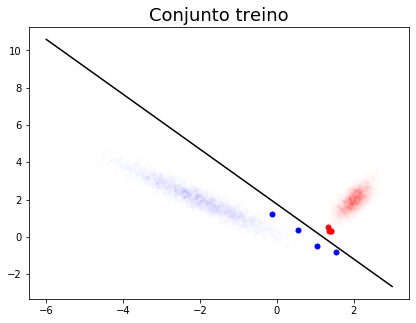